In [157]:
import csv
import sys
import os
import pickle
import random
import numpy as np
import time
import operator
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

import statsmodels.stats.api as sms

import scipy.stats
from scipy.stats import entropy
from scipy.stats import spearmanr
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

In [158]:
sys.path.append('../python')
from permutation import permutation, compute_alignment_strength
from utils.utils_funcs import get_variance, get_distinctness, get_distinctness_from_nearest_5, aggregate_embeddings_visual_and_language
from utils.utils_funcs import load_data_to_dict

In [174]:
def get_alignment_strength_list(struct,concepts,n_sim=1000):
    visual_embeddings_list=list()
    langauge_embeddings_list=list()
    for concept in concepts:
        embeddings=struct["embeds"][concept]
        visual_embeddings_list.append(embeddings["visual"])
        langauge_embeddings_list.append(embeddings["language"])
    z_0=np.array(visual_embeddings_list)
    z_1=np.array(langauge_embeddings_list)
    return permutation(z_0,z_1,n_sim=n_sim)

In [160]:
vg_noun_data=pickle.load(open("../data/dumped_embeddings_replication/vg_noun_least20_ll_swav_bert_20.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_embeddings_replication/vg_verb_least20_ll_swav_bert_20.pkl","rb"))

aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,1,1)
aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,1,1)

In [161]:
_,vg_noun_list=get_alignment_strength_list(aggregated_vg_noun_data,aggregated_vg_noun_data["words"])

In [162]:
_,vg_verb_list=get_alignment_strength_list(aggregated_vg_verb_data,aggregated_vg_verb_data["words"])

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(-0.03, 27, 'VG Nouns')

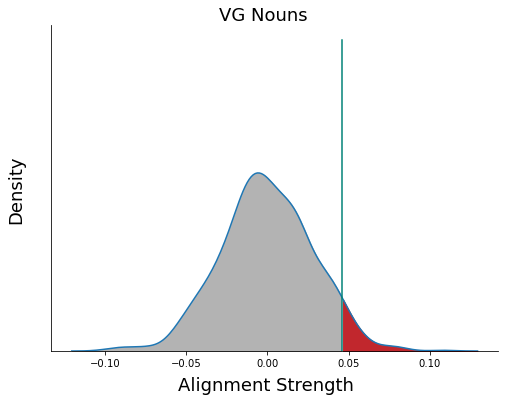

In [77]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.distplot(vg_noun_list,hist=False)
sns.despine()
data_x, data_y = ax.lines[0].get_data()
x_t = vg_noun_list[0]
y_t = np.interp(x_t ,data_x, data_y)
# plt.plot(x_t ,y_t , marker="*", markersize=8, color='r')
ax.plot((x_t, x_t), (0, 25), color='#008176')

plt.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
plt.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

ax.text(-0.055, -2.8, "Alignment Strength", va='center', fontsize=18)
# ax.set_xlabel("Alignment Strength",fontsize=18)
ax.set_ylabel("")
ax.text(-0.16, 13, "Density", rotation=90, va='center', fontsize=18)
ax.set_yticks([])
ax.text(-0.03, 27, "VG Nouns", va='center', fontsize=18)
# plt.suptitle("VG Nouns",fontsize=18)

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


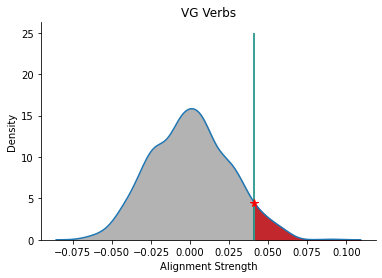

In [31]:
ax=sns.distplot(vg_verb_list,hist=False)
sns.despine()
data_x, data_y = ax.lines[0].get_data()
x_t = vg_verb_list[0]
y_t = np.interp(x_t ,data_x, data_y)
ax.set(xlabel='Alignment Strength',title='VG Verbs')
# ax.vlines(x_t,0,25,color='#008176')
# plt.plot(x_t, y_t, marker="*", markersize=8, color='r')

plt.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
plt.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


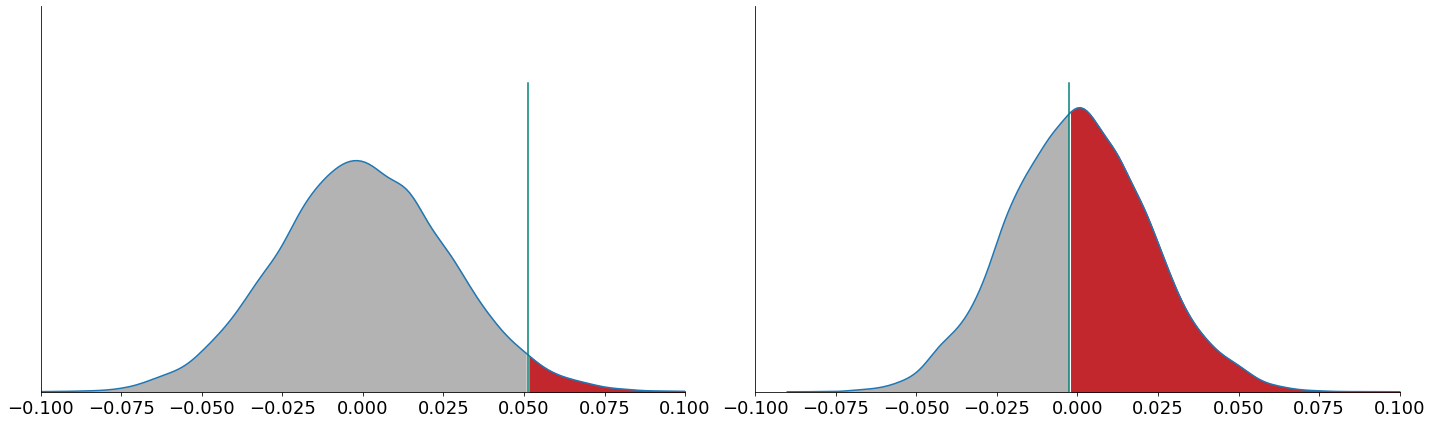

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

sns.distplot(vg_noun_list,hist=False,ax=ax1)
sns.despine()
data_x, data_y = ax1.lines[0].get_data()
x_t = vg_noun_list[0]
y_t = np.interp(x_t ,data_x, data_y)
ax1.plot((x_t, x_t), (0, 20), color='#008176')

ax1.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
ax1.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

ax1.set_ylim([0, 25])
ax1.set_xlim([-0.1, 0.1])

ax1.tick_params(axis='both', which='major', labelsize=18)

# ax1.text(-0.035, -2.8, "Alignment Strength", va='center', fontsize=36)
ax1.set_ylabel("")
ax1.set_yticks([])
# ax1.text(-0.118, 13, "Density", rotation=90, va='center', fontsize=36)
# ax1.text(-0.022, 27, "VG Nouns", va='center', fontsize=36)

sns.distplot(vg_verb_list,hist=False,ax=ax2)
sns.despine()
data_x, data_y = ax2.lines[0].get_data()
x_t = vg_verb_list[0]
y_t = np.interp(x_t ,data_x, data_y)
ax2.plot((x_t, x_t), (0, 20), color='#008176')

ax2.fill_between(data_x,data_y, where = data_x >=x_t, color="#c1272d")
ax2.fill_between(data_x,data_y, where = data_x <=x_t, color="#b3b3b3")

ax2.set_xlim([-0.1, 0.1])

ax2.tick_params(axis='both', which='major', labelsize=18)

# ax2.text(-0.035, -2.8, "Alignment Strength", va='center', fontsize=36)
ax2.set_ylabel("")
ax2.set_yticks([])
# ax2.text(-0.022, 27, "VG Verbs", va='center', fontsize=36)

plt.tight_layout()
plt.savefig("../figs/single_alignment.png",dpi=600)
plt.show()

In [168]:
np.sum([1 if i<vg_noun_list[0] else 0 for i in vg_noun_list[1:]])/len(vg_noun_list[1:])

0.9737

In [169]:
np.sum([1 if i<vg_verb_list[0] else 0 for i in vg_verb_list[1:]])/len(vg_verb_list[1:])

0.444

In [170]:
vg_verb_list[0]

-0.0027757512619901556

In [171]:
d1=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
d2=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

In [175]:
_,temp1=get_alignment_strength_list(d1,d1["words"],n_sim=100)

In [177]:
temp1[0]

0.22450835142785655

In [178]:
_,temp2=get_alignment_strength_list(d2,d2["words"],n_sim=100)

In [179]:
temp2[0]

0.13728430959071655